Data science  intern at  codeclause

Project: Movie Analysis

Name: Venkata Akshay


In [30]:
#install kaggle
!pip install -q kaggle

In [31]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"akshayvaranasi0505","key":"5308871b9134bf4985dd018aa1eb070e"}'}

In [32]:
#create a kaggle folder
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [33]:
#copy the kaggle.json to the folder created
! cp kaggle.json ~/.kaggle/

In [34]:
#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [35]:
!kaggle datasets download -d beyjin/movies-1990-to-2017

movies-1990-to-2017.zip: Skipping, found more recently modified local copy (use --force to force download)


In [37]:
!unzip movies-1990-to-2017.zip

Archive:  movies-1990-to-2017.zip
  inflating: Movie_Actors.csv        
  inflating: Movie_AdditionalRating.csv  
  inflating: Movie_Genres.csv        
  inflating: Movie_Movies.csv        
  inflating: Movie_Writer.csv        


In [38]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [39]:
genres=pd.read_csv ("/content/Movie_Genres.csv")
ratings=pd.read_csv ("/content/Movie_AdditionalRating.csv")
movies=pd.read_csv("/content/Movie_Movies.csv")

<ipython-input-39-3746a7f7683f>:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  movies=pd.read_csv("/content/Movie_Movies.csv")


In [40]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308565 entries, 0 to 308564
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  308565 non-null  int64 
 1   Genre       308565 non-null  object
 2   imdbID      308565 non-null  object
dtypes: int64(1), object(2)
memory usage: 7.1+ MB


In [41]:
ratings.info()
len(ratings.imdbID.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    92016 non-null  int64 
 1   Rating        92016 non-null  object
 2   RatingSource  92016 non-null  object
 3   imdbID        92016 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


62394

In [42]:
ratings.drop_duplicates(subset='imdbID',inplace=True)
genres.drop_duplicates(subset='imdbID',inplace=True)
ratings.drop_duplicates(subset='imdbID',inplace=True)
genres.Genre= [x.strip()for x in genres.Genre]

In [43]:
rawdirectors=movies["Director"].value_counts()[:10]
pd.DataFrame({'Director':rawdirectors.index, 'NumberOfMoviesProduced':rawdirectors.values})

,Director,NumberOfMoviesProduced
0,Jim Powers,151
1,D.W. Griffith,101
2,Lewin Fitzhamon,95
3,Dave Fleischer,94
4,Al Christie,90
5,Georges Méliès,86
6,Gilbert M. 'Broncho Billy' Anderson,85
7,Quasarman,84
8,Kevin Dunn,83
9,James H. White,78


In [44]:
rated=pd.merge(movies,ratings, on = 'imdbID')
rated.drop_duplicates(subset='imdbID',inplace=True)
rateddirectors=rated['Director'].value_counts()[:10]
pd.DataFrame({'Director':rateddirectors.index, 'NumberOfMoviesProduced':rateddirectors.values})

,Director,NumberOfMoviesProduced
0,D.W. Griffith,82
1,Kevin Dunn,77
2,Georges Méliès,73
3,Laurent Bouzereau,70
4,Dave Fleischer,67
5,Stan Brakhage,50
6,Paul Thomas,47
7,Friz Freleng,44
8,James H. White,42
9,Sam Newfield,37


In [45]:
updated=pd.merge(movies,genres, on = 'imdbID',how="left")
notwanted=["Short", "Adult"]
notwantedids=updated[updated.Genre.isin(notwanted)]["imdbID"]
#dropping the ids that have at least a genre belonging in the notwanted
updated.drop(updated[updated.imdbID.isin(notwantedids)].index, inplace=True)
updated.drop_duplicates(subset='imdbID',inplace=True)
updated = updated.reset_index(drop=True)

In [46]:
updateddirectors=updated['Director'].value_counts()[:10].index.tolist()
filmstopten=updated[updated.Director.isin(updateddirectors)]
genredirectors=updated['Director'].value_counts()[:10]
pd.DataFrame({'Director':genredirectors.index, 'NumberOfMoviesProduced':genredirectors.values})

,Director,NumberOfMoviesProduced
0,Dave Fleischer,94
1,Kevin Dunn,83
2,James H. White,58
3,Laurent Bouzereau,56
4,Sam Newfield,55
5,William Beaudine,53
6,Allen Curtis,50
7,Jon Woods,49
8,Al Christie,49
9,Bud Fisher,48


In [47]:
rated.drop(rated[rated.imdbID.isin(notwantedids)].index, inplace=True)
finaldirectors=rated['Director'].value_counts()[:10]
DoubleFilteredDirectors=pd.DataFrame({'Director':finaldirectors.index, 'NumberOfMoviesProduced':finaldirectors.values})
DoubleFilteredDirectors

,Director,NumberOfMoviesProduced
0,Kevin Dunn,77
1,Dave Fleischer,67
2,Laurent Bouzereau,52
3,Friz Freleng,44
4,Sam Newfield,37
5,Hamish Hamilton,36
6,Godfrey Ho,33
7,Chuck Jones,32
8,"Joseph Barbera, William Hanna",31
9,James H. White,29


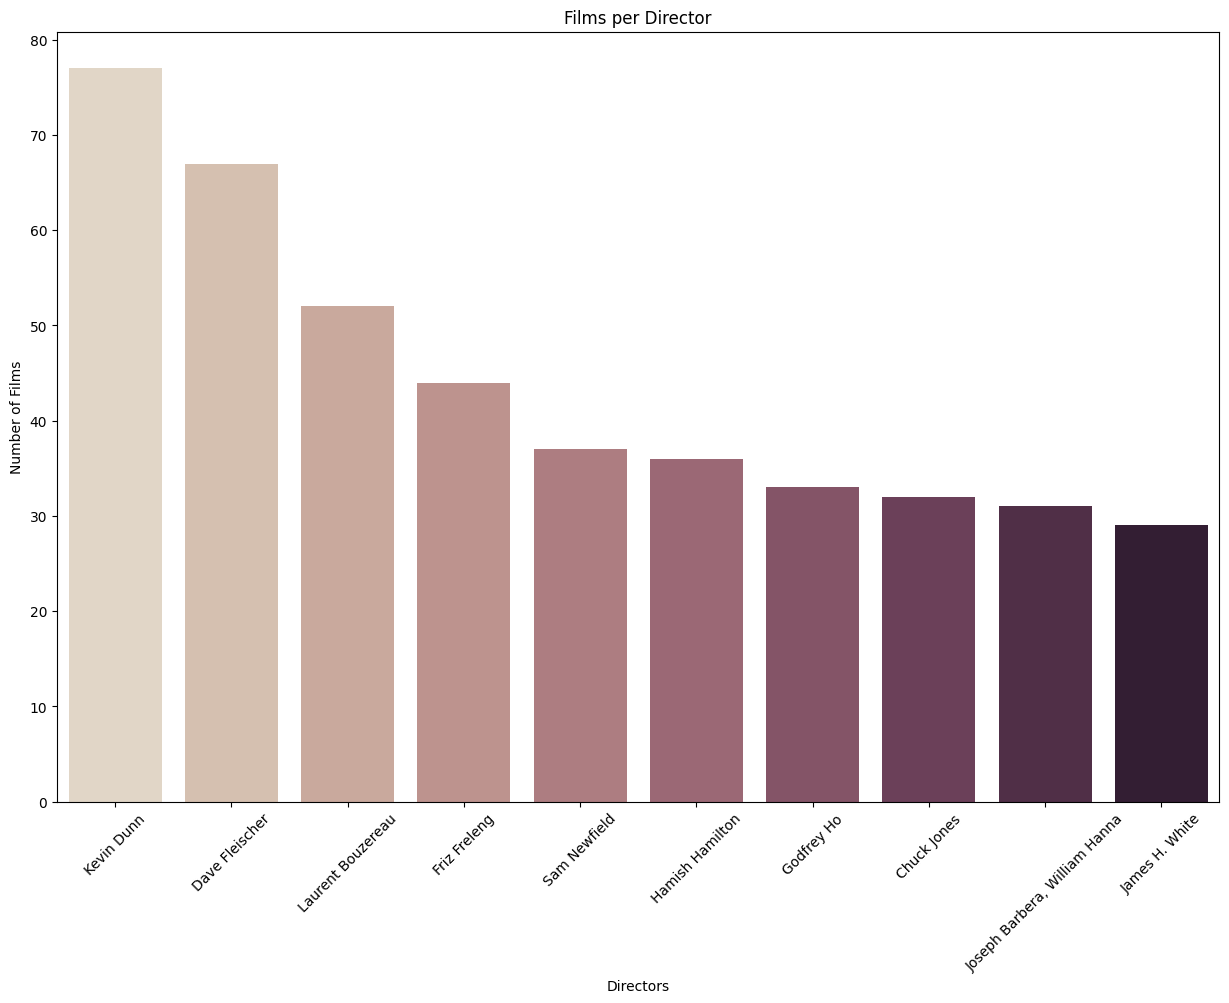

In [48]:
plt.figure(figsize=(15,10))
boom=sns.barplot(x="Director", y='NumberOfMoviesProduced', palette="ch:.25", data=DoubleFilteredDirectors)
plt.xticks(rotation= 45)
plt.xlabel('Directors')
plt.ylabel('Number of Films')
plt.title('Films per Director')
plt.show()